In [2]:
%pip install yfinance

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf 

In [3]:
from datetime import datetime
end=datetime.now()
start=datetime(end.year-20, end.month,end.day)

In [5]:
stock="GOOG"
google_data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [6]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-14,3.512086,3.546208,3.451065,3.536743,3.528079,209835578
2004-10-15,3.609720,3.623917,3.535498,3.589296,3.580503,265150137
2004-10-18,3.566631,3.716071,3.517067,3.715075,3.705974,282061287
2004-10-19,3.748450,3.795773,3.669994,3.684689,3.675662,363918964
2004-10-20,3.686930,3.710841,3.476967,3.499134,3.490562,456613107


In [7]:
google_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-08,165.429993,166.100006,164.309998,165.699997,165.699997,11723900
2024-10-09,164.854996,166.259995,161.119995,163.059998,163.059998,19666400
2024-10-10,162.110001,164.311005,161.639999,163.179993,163.179993,12900500
2024-10-11,163.330002,165.270004,162.500000,164.520004,164.520004,10940500
2024-10-14,164.910004,167.619904,164.789993,165.880005,165.880005,4207574


In [8]:
google_data.shape

(5034, 6)

In [9]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,46.826230,47.318733,46.357893,46.845392,46.735117,1.137402e+08
std,44.772045,45.262791,44.331918,44.798918,44.701430,1.489082e+08
min,3.512086,3.546208,3.451065,3.499134,3.490562,1.584340e+05
25%,13.174556,13.324244,13.038254,13.176362,13.144082,2.686500e+07
50%,27.561829,27.753054,27.250683,27.523885,27.456457,5.318726e+07
75%,61.725750,62.243000,61.206375,61.741000,61.589745,1.382733e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [10]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-10-14 to 2024-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [11]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

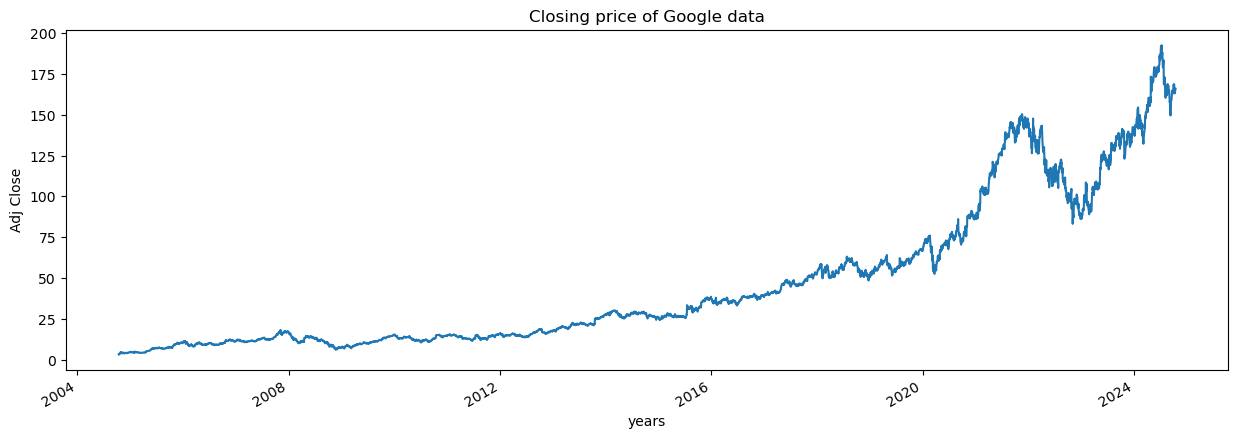

In [13]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [14]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [15]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

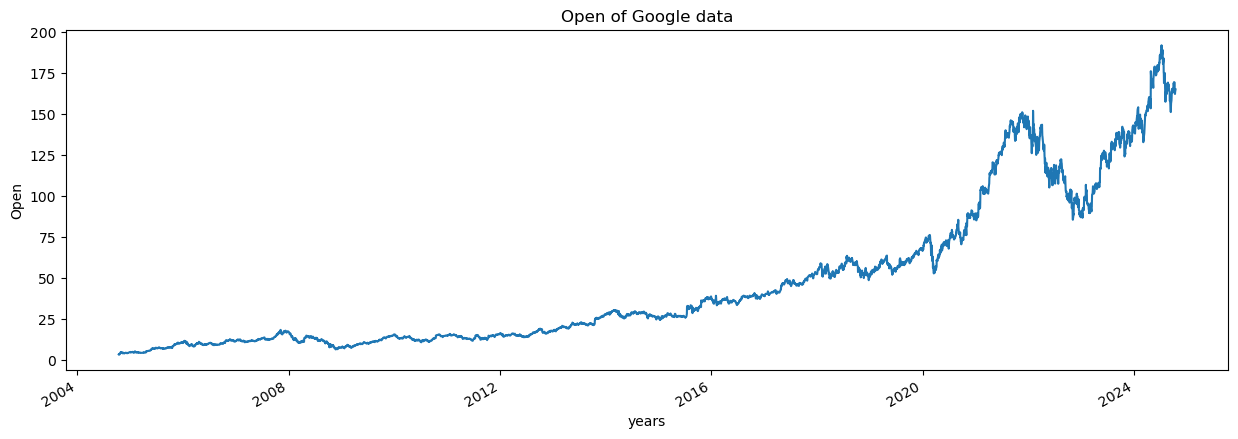

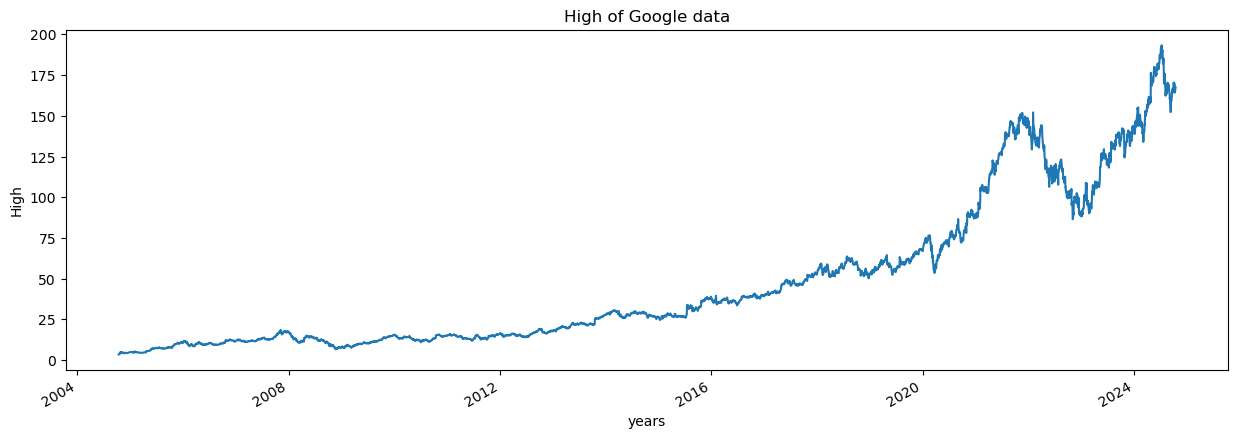

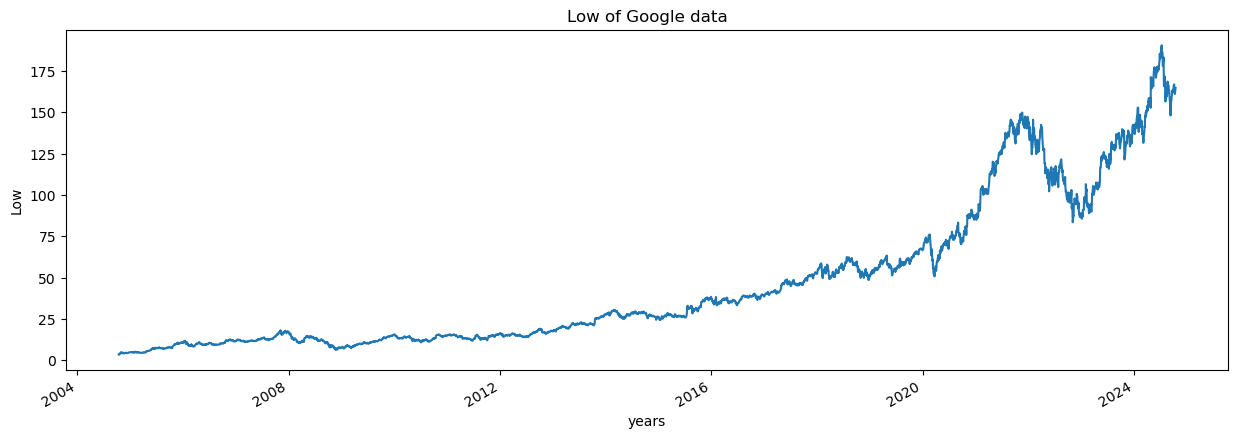

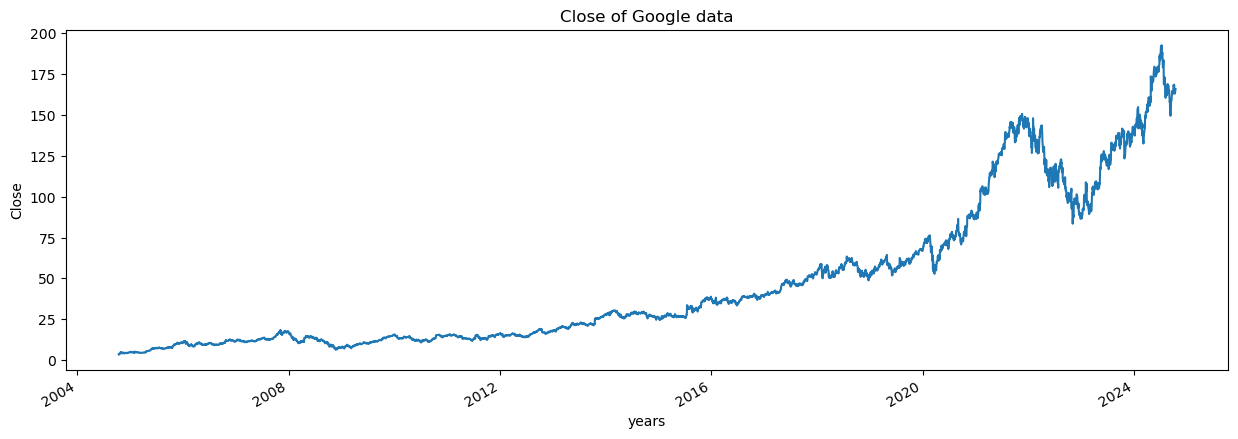

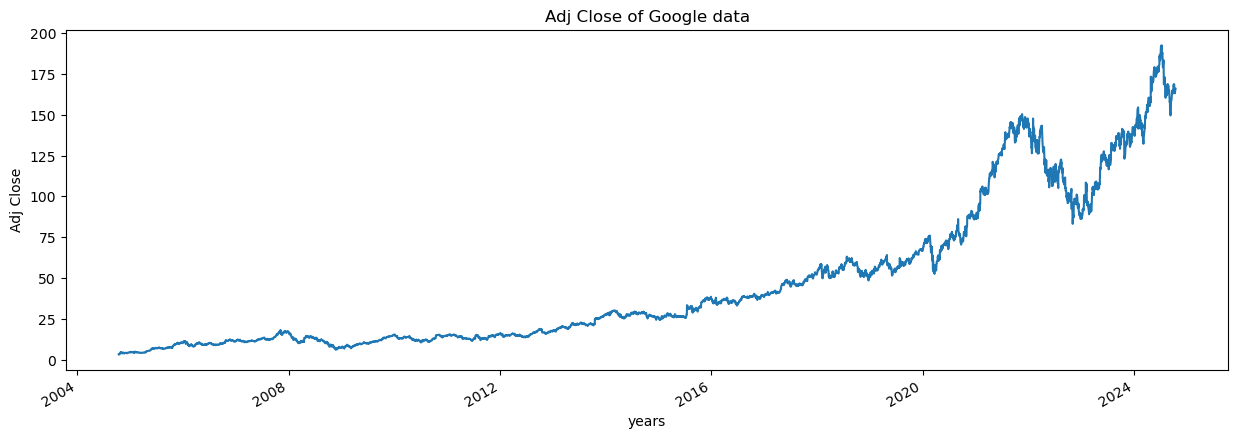

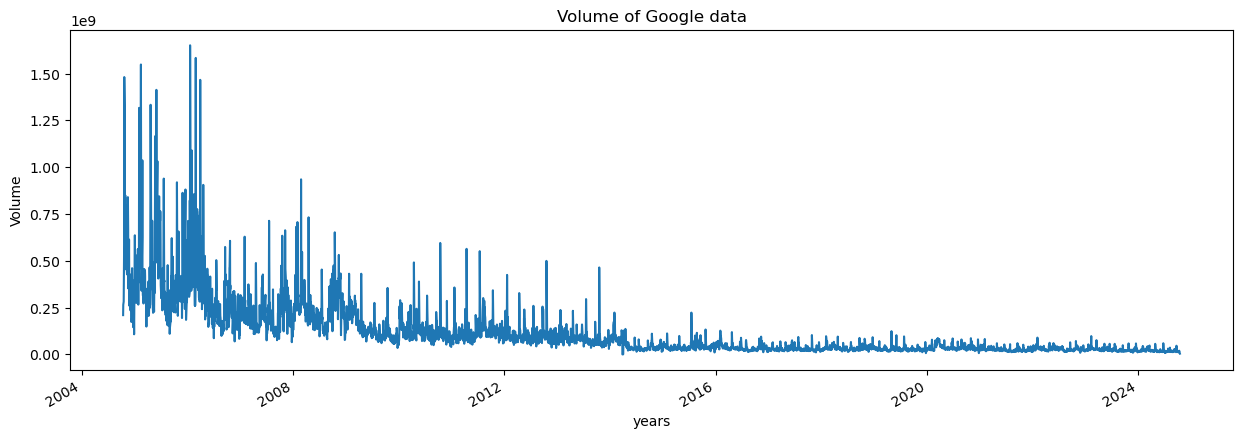

In [16]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [18]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 55
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 198


In [21]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [22]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-10-04         NaN
2005-10-05         NaN
2005-10-06         NaN
2005-10-07         NaN
2005-10-10    5.727545
Name: MA_for_250_days, dtype: float64

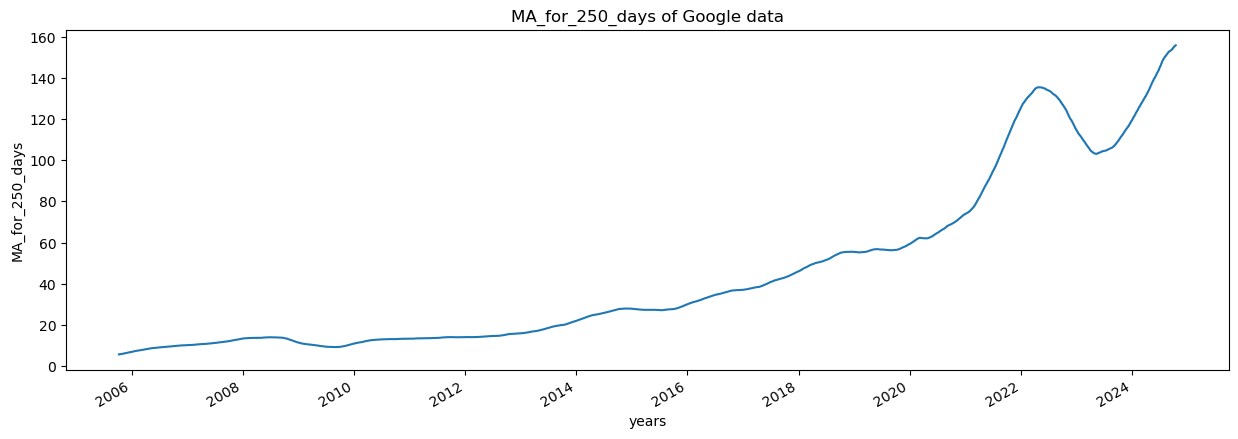

In [23]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

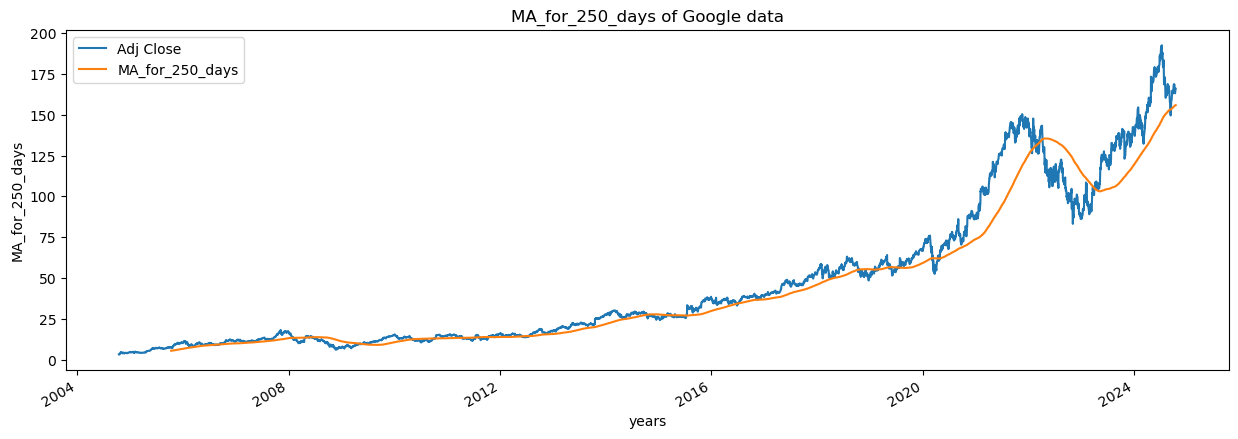

In [24]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

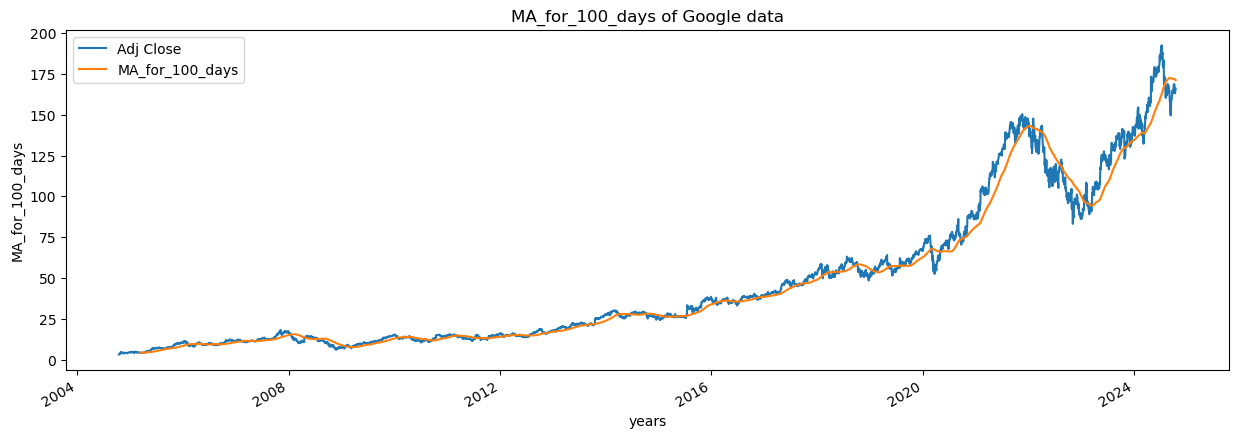

In [25]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

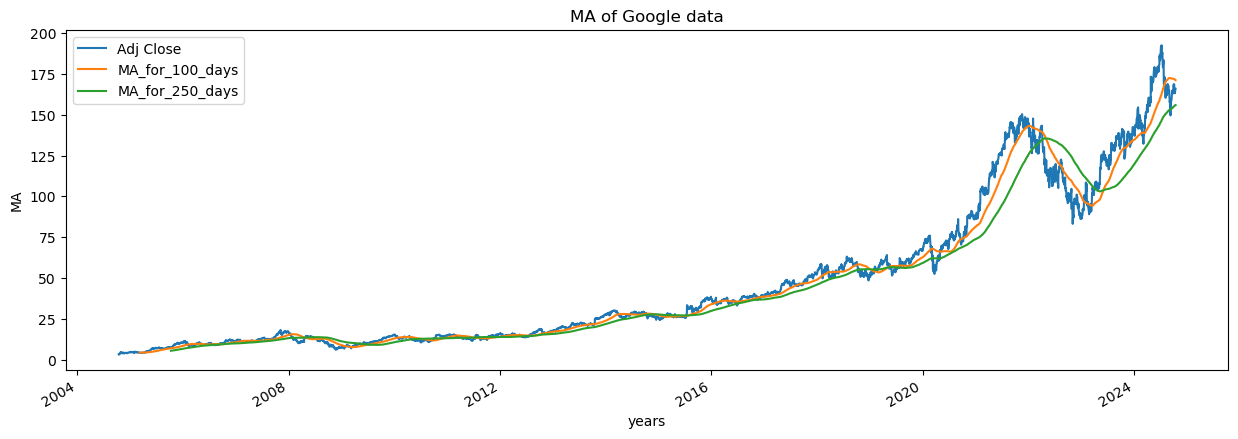

In [26]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [27]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-10-14,3.528079,NaN
2004-10-15,3.580503,0.014859
2004-10-18,3.705974,0.035043
2004-10-19,3.675662,-0.008179
2004-10-20,3.490562,-0.050358


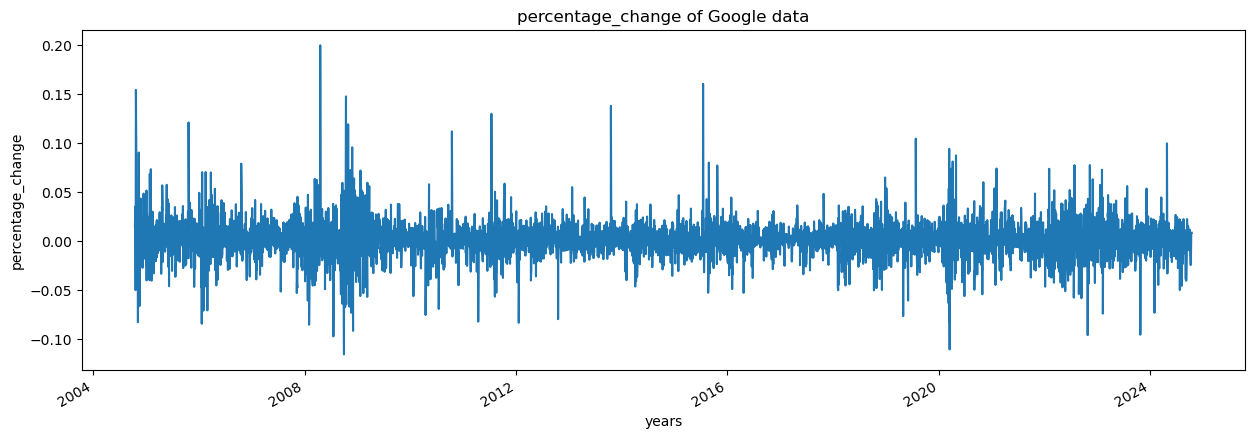

In [28]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [29]:
Adj_close_price = google_data[['Adj Close']]

In [30]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([3.49056196]))

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[1.98588589e-04],
       [4.76090890e-04],
       [1.14025132e-03],
       ...,
       [8.45292588e-01],
       [8.52385743e-01],
       [8.59584707e-01]])

In [32]:
len(scaled_data)

5034

In [33]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [34]:
x_data[0],y_data[0]

(array([[0.00019859],
        [0.00047609],
        [0.00114025],
        [0.0009798 ],
        [0.        ],
        [0.00116918],
        [0.00420065],
        [0.00616945],
        [0.00543296],
        [0.00598138],
        [0.0069454 ],
        [0.00659556],
        [0.00730444],
        [0.00715188],
        [0.00673102],
        [0.00581435],
        [0.00379557],
        [0.00421642],
        [0.00371009],
        [0.00359961],
        [0.0055934 ],
        [0.00545926],
        [0.00583671],
        [0.00421511],
        [0.00420985],
        [0.00355753],
        [0.00380215],
        [0.00323663],
        [0.0035549 ],
        [0.00450708],
        [0.005116  ],
        [0.00533432],
        [0.00545663],
        [0.00519097],
        [0.00511732],
        [0.00524883],
        [0.0047083 ],
        [0.00406913],
        [0.00387843],
        [0.00433216],
        [0.00409806],
        [0.00394024],
        [0.00502394],
        [0.00516729],
        [0.00473197],
        [0

In [35]:

int(len(x_data)*0.7)

3453

In [36]:
5034-100-int(len(x_data)*0.7)

1481

In [37]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [40]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [41]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [42]:
from keras.models import Sequential # type: ignore
from keras.layers import Dense, LSTM, Input # type: ignore

In [43]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 140s 39ms/step - loss: 2.9022e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 121s 35ms/step - loss: 6.1005e-05


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [47]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [48]:
predictions

array([[0.25266472],
       [0.251845  ],
       [0.25459763],
       ...,
       [0.8343835 ],
       [0.83195555],
       [0.8361238 ]], dtype=float32)

In [49]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 51.22301 ],
       [ 51.068153],
       [ 51.58817 ],
       ...,
       [161.1191  ],
       [160.66042 ],
       [161.44786 ]], dtype=float32)

In [50]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.06858444],
       [ 52.30255508],
       [ 52.09257126],
       ...,
       [163.17999268],
       [164.52000427],
       [165.88000488]])

In [51]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))


In [52]:
rmse

2.648492548763035

In [53]:
ploting_data=pd.DataFrame(
    {
        'original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1)
    },
    index= google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-11-23,51.068584,51.223011
2018-11-26,52.302555,51.068153
2018-11-27,52.092571,51.588169
2018-11-28,54.178448,51.849911
2018-11-29,54.281693,52.969288


<Figure size 640x480 with 0 Axes>

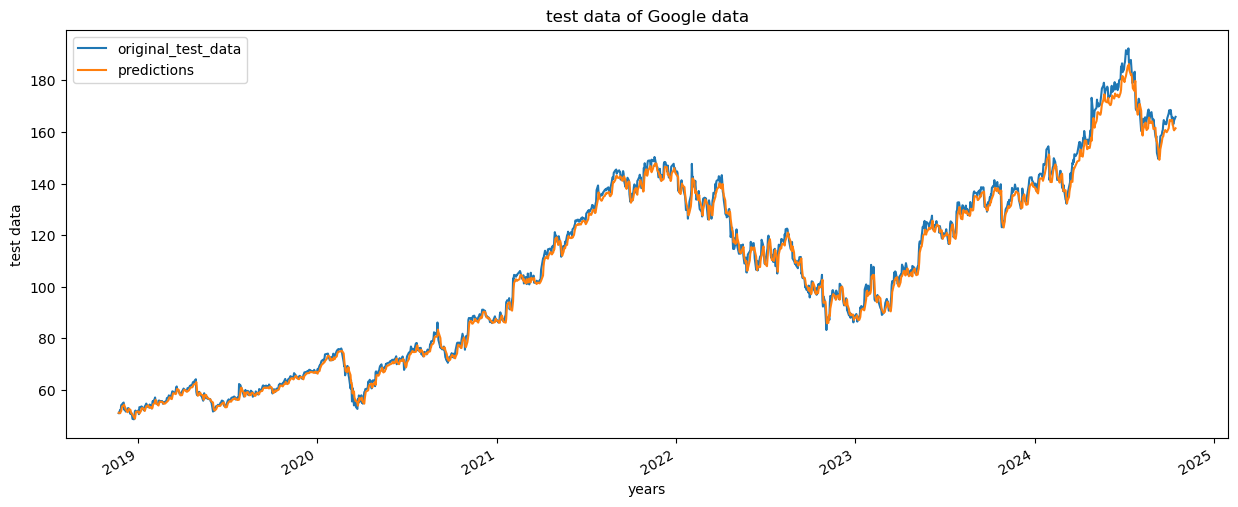

In [54]:
plot_graph((15,6), ploting_data, 'test data')

In [1]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

NameError: name 'plot_graph' is not defined

In [59]:
model.save("Latest_stock_price_model.keras")